In [133]:
import h5py
from matplotlib import pyplot as plt
import pandas as pd

In [134]:
fg_path = '/home/seiya.tsukamoto/aframe/mm_v1/mm_v1/results/foreground.hdf5'
bg_path = '/home/seiya.tsukamoto/aframe/mm_v1/mm_v1/results/background.hdf5'
fg_test_path = '/home/seiya.tsukamoto/aframe/test/foreground.hdf5'
bg_test_path = '/home/seiya.tsukamoto/aframe/test/background.hdf5'
fg_sjh_path = '/home/seiya.tsukamoto/aframe/test/foreground_sjh.hdf5'
bg_sjh_path = '/home/seiya.tsukamoto/aframe/test/background_sjh.hdf5'

In [135]:
with h5py.File(fg_path, 'r') as f:
    ds = ['detection_statistic', 'detection_time']
    fg_df = pd.DataFrame({key: f['parameters'][key] for key in ds})
with h5py.File(bg_path, 'r') as f:
    ds = ['detection_statistic', 'detection_time']
    bg_df = pd.DataFrame({key: f['parameters'][key] for key in ds})
with h5py.File(fg_test_path, 'r') as f:
    ds = ['detection_statistic', 'detection_time']
    fg_test_df = pd.DataFrame({key: f['parameters'][key] for key in ds})
with h5py.File(bg_test_path, 'r') as f:
    ds = ['detection_statistic', 'detection_time']
    bg_test_df = pd.DataFrame({key: f['parameters'][key] for key in ds})
with h5py.File(fg_sjh_path, 'r') as f:
    ds = ['detection_statistic', 'detection_time']
    fg_sjh_df = pd.DataFrame({key: f['parameters'][key] for key in ds})
with h5py.File(bg_sjh_path, 'r') as f:
    ds = ['detection_statistic', 'detection_time']
    bg_sjh_df = pd.DataFrame({key: f['parameters'][key] for key in ds})

In [136]:
bg_df = bg_df.sort_values('detection_time')
fg_df = fg_df.sort_values('detection_time')
bg_test_df = bg_test_df.sort_values('detection_time')
fg_test_df = fg_test_df.sort_values('detection_time')
bg_sjh_df = bg_sjh_df.sort_values('detection_time')
fg_sjh_df = fg_sjh_df.sort_values('detection_time')

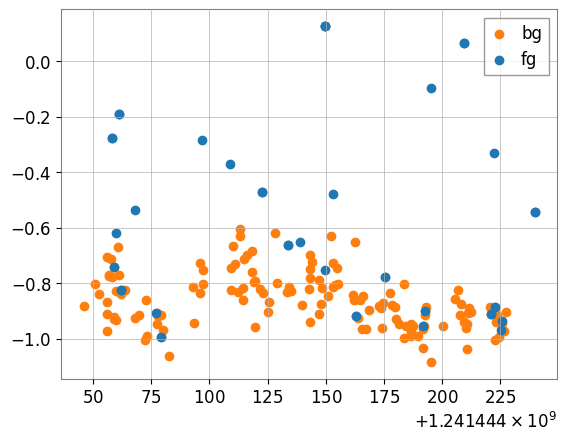

In [145]:
tt = (bg_df['detection_time']<(min(bg_df['detection_time'])+400)) & (bg_df['detection_time']>(min(bg_df['detection_time'])+200))
plt.scatter(bg_df.loc[tt, 'detection_time'], bg_df.loc[tt, 'detection_statistic'], color = 'C1', label = 'bg')
tt = (fg_df['detection_time']<(min(bg_df['detection_time'])+400)) & (fg_df['detection_time']>(min(bg_df['detection_time'])+200))
plt.scatter(fg_df.loc[tt, 'detection_time'], fg_df.loc[tt, 'detection_statistic'], color = 'C0', label = 'fg')
plt.legend()
plt.show()
plt.close()

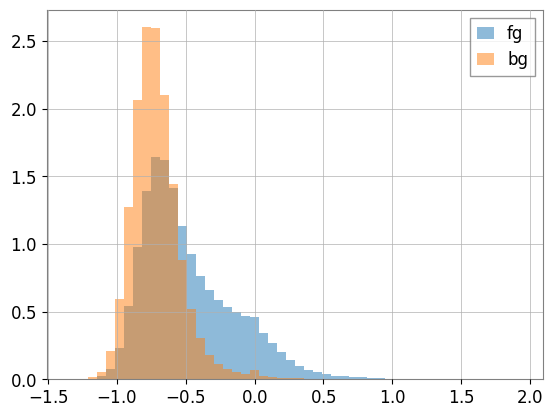

In [146]:
_, bins, _ = plt.hist(fg_df['detection_statistic'], density = True, alpha = .5, bins = 50, label = 'fg', color = 'C0')
plt.hist(bg_df['detection_statistic'], density = True, alpha = .5, bins = bins, label = 'bg', color = 'C1')
plt.legend()
plt.show()
plt.close()

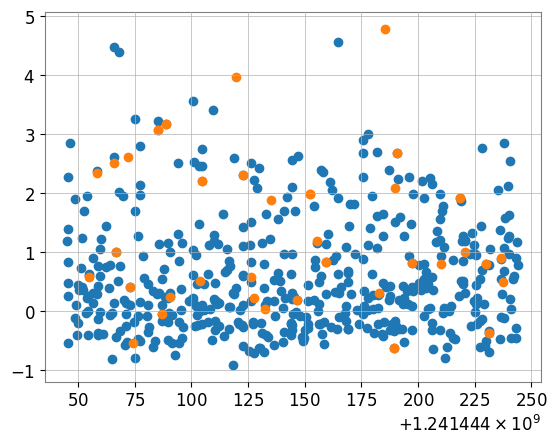

In [139]:
tt = (bg_test_df['detection_time']<(min(bg_test_df['detection_time'])+400)) & (bg_test_df['detection_time']>(min(bg_test_df['detection_time'])+200))
plt.scatter(bg_test_df.loc[tt, 'detection_time'], bg_test_df.loc[tt, 'detection_statistic'], color = 'C0')

tt = (fg_test_df['detection_time']<(min(bg_test_df['detection_time'])+400)) & (fg_test_df['detection_time']>(min(bg_test_df['detection_time'])+200))
plt.scatter(fg_test_df.loc[tt, 'detection_time'], fg_test_df.loc[tt, 'detection_statistic'], color = 'C1')
plt.show()
plt.close()

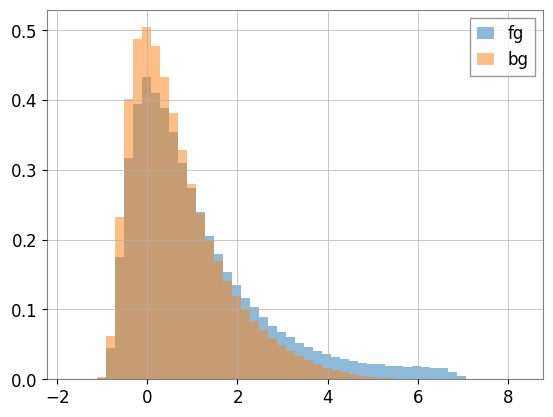

In [140]:
_, bins, _ = plt.hist(fg_test_df['detection_statistic'], density = True, alpha = .5, bins = 50, label = 'fg')
plt.hist(bg_test_df['detection_statistic'], density = True, alpha = .5, bins = bins, label = 'bg')
plt.legend()
plt.show()
plt.close()

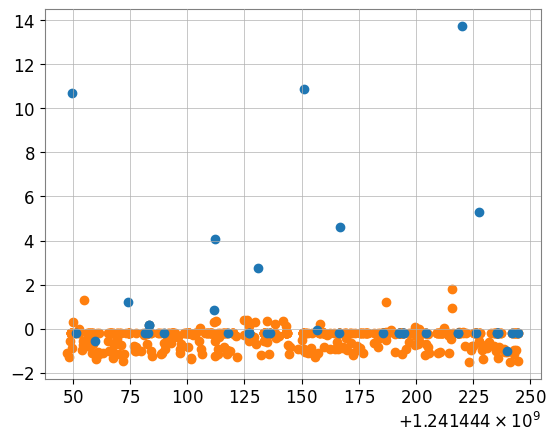

In [147]:
tt = (bg_sjh_df['detection_time']<(min(bg_sjh_df['detection_time'])+400)) & (bg_sjh_df['detection_time']>(min(bg_sjh_df['detection_time'])+200))
plt.scatter(bg_sjh_df.loc[tt, 'detection_time'], bg_sjh_df.loc[tt, 'detection_statistic'], color = 'C1')

tt = (fg_sjh_df['detection_time']<(min(bg_sjh_df['detection_time'])+400)) & (fg_sjh_df['detection_time']>(min(bg_sjh_df['detection_time'])+200))
plt.scatter(fg_sjh_df.loc[tt, 'detection_time'], fg_sjh_df.loc[tt, 'detection_statistic'], color = 'C0')
plt.show()
plt.close()

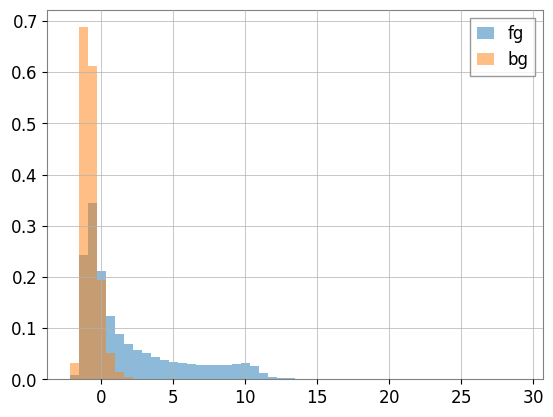

In [142]:
_, bins, _ = plt.hist(fg_sjh_df['detection_statistic'], density = True, alpha = .5, bins = 50, label = 'fg')
plt.hist(bg_sjh_df['detection_statistic'], density = True, alpha = .5, bins = bins, label = 'bg')
plt.legend()
plt.show()
plt.close()

In [109]:
import logging
from pathlib import Path
from typing import Callable, List, Optional
from pathlib import Path
import sys
sys.path.append('/home/seiya.tsukamoto/aframe/projects/plots/')
sys.path.append('/home/seiya.tsukamoto/aframe/libs/priors/')
from plots.legacy.main import main
import math 

mass_combos =  [[35, 35], [35, 20], [20, 20], [20,10]]
from aframe.parameters import PathParameter, load_prior
source_prior = load_prior('priors.priors.end_o3_ratesandpops')
import h5py
import jsonargparse
import numpy as np
from bokeh.io import save
from bokeh.layouts import gridplot

from ledger.events import EventSet, RecoveredInjectionSet
from ledger.injections import InjectionParameterSet
from plots.legacy import compute, tools
from plots.legacy.gwtc3 import main as gwtc3_pipeline_sv
from plots.vetos import VETO_CATEGORIES, VetoParser, get_catalog_vetos
from priors.priors import log_normal_masses
from utils.cosmology import DEFAULT_COSMOLOGY, get_astrophysical_volume
from utils.logging import configure_logging
output_dir=Path('/home/seiya.tsukamoto/aframe/mm_v1/mm_v1/infer_testing/')
INJECTION_FILE = '/home/seiya.tsukamoto/aframe/mm_v1/mm_v1/infer_testing/endo3_mixture-LIGO-T2100113-v12-1256655642-12905976.hdf5'
VETO_DEFINER_FILE = '/home/seiya.tsukamoto/aframe/projects/plots/plots/vetos/H1L1-HOFT_C01_O3_CBC.xml'
GATE_PATHS = {
    "H1": "/home/seiya.tsukamoto/aframe/projects/plots/plots/vetos/H1-O3_GATES_1238166018-31197600.txt",
    "L1": "/home/seiya.tsukamoto/aframe/projects/plots/plots/vetos/L1-O3_GATES_1238166018-31197600.txt",
}

logging.getLogger("urllib3").setLevel(logging.WARNING)
max_far = 365
sigma = 0.1
dt = math.inf
def get_prob(prior, ledger):
    sample = {"mass_1": ledger.mass_1, "mass_2": ledger.mass_2}
    return prior.prob(sample, axis=0)

In [110]:
background = EventSet.read(Path(bg_path))
foreground = RecoveredInjectionSet.read(Path(fg_path))
mask = foreground.snr > 1e4
num_unphysical = sum(mask)
if num_unphysical > 0:
    foreground = foreground[~mask]
    print(
        f"Removed {num_unphysical} foreground events with SNR > 10,000"
    )
rejected_params = InjectionParameterSet.read(Path('/home/seiya.tsukamoto/aframe/mm_v1/data/test/rejected-parameters.hdf5'))

for i in range(2):
    mass = f"mass_{i + 1}"
    for ledger in [foreground, rejected_params]:
        val = getattr(ledger, mass)
        setattr(ledger, mass, val / (1 + ledger.redshift))

start, stop = (
    background.detection_time.min(),
    background.detection_time.max(),
)

# optionally apply vetos
# if user passed list of veto categories
print("Computing data likelihood under source prior")
source, _ = source_prior(DEFAULT_COSMOLOGY)
source_probs = get_prob(source, foreground)
source_rejected_probs = get_prob(source, rejected_params)

print("Computing maximum astrophysical volume")
zprior = source["redshift"]
zmin, zmax = zprior.minimum, zprior.maximum

try:
    decprior = source["dec"]
except KeyError:
    decrange = None
else:
    decrange = (decprior.minimum, decprior.maximum)
v0 = get_astrophysical_volume(zmin, zmax, DEFAULT_COSMOLOGY, decrange)
v0 /= 10**9

Tb = background.Tb / tools.SECONDS_PER_YEAR
max_events = int(max_far * Tb)
fars = np.arange(1, max_events + 1) / Tb
thresholds = np.sort(background.detection_statistic)[-max_events:][::-1]

weights = np.zeros((len(mass_combos), len(source_probs)))
for i, combo in enumerate(mass_combos):
    print(f"Computing likelihoods under {combo} log normal")
    prior, _ = log_normal_masses(
        *combo, sigma=sigma, cosmology=DEFAULT_COSMOLOGY
    )
    prob = get_prob(prior, foreground)
    rejected_prob = get_prob(prior, rejected_params)

    weight = prob / source_probs

    rejected_weights = rejected_prob / source_rejected_probs
    norm = weight.sum() + rejected_weights.sum()
    weight /= norm

    if dt is not None:
        print(f"Enforcing recovery time delta of {dt} seconds")
        mask = (
            np.abs(foreground.detection_time - foreground.injection_time)
            <= dt
        )
        weight[~mask] = 0

    weights[i] = weight

print("Computing sensitive volume at thresholds")
aframe_sv, aframe_err = compute.sensitive_volume(
    foreground.detection_statistic, weights, thresholds
)
aframe_sv *= v0
aframe_err *= v0

output_dir.mkdir(exist_ok=True, parents=True)
with h5py.File(output_dir / "sensitive_volume.h5", "w") as f:
    f.create_dataset("thresholds", data=thresholds)
    f.create_dataset("fars", data=fars)
    for i, combo in enumerate(mass_combos):
        g = f.create_group("-".join(map(str, combo)))
        g.create_dataset("sv", data=aframe_sv[i])
        g.create_dataset("err", data=aframe_err[i])

print("Calculating SV vs FAR for GWTC-3 pipelines")
gwtc3_sv, gwtc3_err = gwtc3_pipeline_sv(
    mass_combos=mass_combos,
    injection_file=INJECTION_FILE,
    detection_criterion="far",
    detection_thresholds=fars,
    output_dir=output_dir,
)

plots = tools.make_grid(mass_combos)
for i, p in enumerate(plots):
    color = tools.palette[0]
    # only include a legend on the top left
    kwargs = {}
    if i == 0:
        kwargs["legend_label"] = "aframe"
    p.line(fars, aframe_sv[i], line_width=1.5, line_color=color, **kwargs)
    tools.plot_err_bands(
        p,
        fars,
        aframe_sv[i],
        aframe_err[i],
        line_color=color,
        line_width=0.8,
        fill_color=color,
        fill_alpha=0.4,
    )

    for pipeline, color in zip(gwtc3_sv.keys(), tools.palette[1:]):
        m1, m2 = mass_combos[i]
        mass_key = f"{m1}-{m2}"
        sv = gwtc3_sv[pipeline][mass_key]
        err = gwtc3_err[pipeline][mass_key]

        if i == 0:
            kwargs["legend_label"] = pipeline
        p.line(fars, sv, line_width=1.5, line_color=color, **kwargs)
        tools.plot_err_bands(
            p,
            fars,
            sv,
            err,
            line_color=color,
            line_width=0.8,
            fill_color=color,
            fill_alpha=0.4,
        )

# style the legend on the top left plot
legend = plots[0].legend
legend.ncols = 2
# style legend position
legend.location = "top_left"
legend.margin = 4
legend.padding = 2

# style individual glyphs
legend.glyph_height = 6
legend.label_text_font_size = "8pt"
legend.label_height = 8

grid = gridplot(plots, toolbar_location="right", ncols=2)
save(grid, filename=output_dir / "long_sv.html")

Removed 2 foreground events with SNR > 10,000
Computing data likelihood under source prior
Computing maximum astrophysical volume
Computing likelihoods under [35, 35] log normal
Enforcing recovery time delta of inf seconds
Computing likelihoods under [35, 20] log normal
Enforcing recovery time delta of inf seconds
Computing likelihoods under [20, 20] log normal
Enforcing recovery time delta of inf seconds
Computing likelihoods under [20, 10] log normal
Enforcing recovery time delta of inf seconds
Computing sensitive volume at thresholds


100%|████████████████████████████████████████████████████████████████████████████████| 369/369 [00:01<00:00, 296.68it/s]


Calculating SV vs FAR for GWTC-3 pipelines


100%|████████████████████████████████████████████████████████████████████████████████| 369/369 [00:02<00:00, 123.80it/s]
/tmp/ipykernel_2277251/1955042252.py:151: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(grid, filename=output_dir / "long_sv.html")
/tmp/ipykernel_2277251/1955042252.py:151: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(grid, filename=output_dir / "long_sv.html")


'/home/seiya.tsukamoto/aframe/mm_v1/mm_v1/infer_testing/long_sv.html'

In [113]:
background = EventSet.read(Path(bg_test_path))
foreground = RecoveredInjectionSet.read(Path(fg_test_path))
mask = foreground.snr > 1e4
num_unphysical = sum(mask)
if num_unphysical > 0:
    foreground = foreground[~mask]
    print(
        f"Removed {num_unphysical} foreground events with SNR > 10,000"
    )
rejected_params = InjectionParameterSet.read(Path('/home/seiya.tsukamoto/aframe/test/rejected-parameters.hdf5'))

for i in range(2):
    mass = f"mass_{i + 1}"
    for ledger in [foreground, rejected_params]:
        val = getattr(ledger, mass)
        setattr(ledger, mass, val / (1 + ledger.redshift))

start, stop = (
    background.detection_time.min(),
    background.detection_time.max(),
)

# optionally apply vetos
# if user passed list of veto categories
print("Computing data likelihood under source prior")
source, _ = source_prior(DEFAULT_COSMOLOGY)
source_probs = get_prob(source, foreground)
source_rejected_probs = get_prob(source, rejected_params)

print("Computing maximum astrophysical volume")
zprior = source["redshift"]
zmin, zmax = zprior.minimum, zprior.maximum

try:
    decprior = source["dec"]
except KeyError:
    decrange = None
else:
    decrange = (decprior.minimum, decprior.maximum)
v0 = get_astrophysical_volume(zmin, zmax, DEFAULT_COSMOLOGY, decrange)
v0 /= 10**9

Tb = background.Tb / tools.SECONDS_PER_YEAR
max_events = int(max_far * Tb)
fars = np.arange(1, max_events + 1) / Tb
thresholds = np.sort(background.detection_statistic)[-max_events:][::-1]

weights = np.zeros((len(mass_combos), len(source_probs)))
for i, combo in enumerate(mass_combos):
    print(f"Computing likelihoods under {combo} log normal")
    prior, _ = log_normal_masses(
        *combo, sigma=sigma, cosmology=DEFAULT_COSMOLOGY
    )
    prob = get_prob(prior, foreground)
    rejected_prob = get_prob(prior, rejected_params)

    weight = prob / source_probs

    rejected_weights = rejected_prob / source_rejected_probs
    norm = weight.sum() + rejected_weights.sum()
    weight /= norm

    if dt is not None:
        print(f"Enforcing recovery time delta of {dt} seconds")
        mask = (
            np.abs(foreground.detection_time - foreground.injection_time)
            <= dt
        )
        weight[~mask] = 0

    weights[i] = weight

print("Computing sensitive volume at thresholds")
aframe_sv, aframe_err = compute.sensitive_volume(
    foreground.detection_statistic, weights, thresholds
)
aframe_sv *= v0
aframe_err *= v0

output_dir.mkdir(exist_ok=True, parents=True)
with h5py.File(output_dir / "sensitive_volume.h5", "w") as f:
    f.create_dataset("thresholds", data=thresholds)
    f.create_dataset("fars", data=fars)
    for i, combo in enumerate(mass_combos):
        g = f.create_group("-".join(map(str, combo)))
        g.create_dataset("sv", data=aframe_sv[i])
        g.create_dataset("err", data=aframe_err[i])

print("Calculating SV vs FAR for GWTC-3 pipelines")
gwtc3_sv, gwtc3_err = gwtc3_pipeline_sv(
    mass_combos=mass_combos,
    injection_file=INJECTION_FILE,
    detection_criterion="far",
    detection_thresholds=fars,
    output_dir=output_dir,
)

plots = tools.make_grid(mass_combos)
for i, p in enumerate(plots):
    color = tools.palette[0]
    # only include a legend on the top left
    kwargs = {}
    if i == 0:
        kwargs["legend_label"] = "aframe"
    p.line(fars, aframe_sv[i], line_width=1.5, line_color=color, **kwargs)
    tools.plot_err_bands(
        p,
        fars,
        aframe_sv[i],
        aframe_err[i],
        line_color=color,
        line_width=0.8,
        fill_color=color,
        fill_alpha=0.4,
    )

    for pipeline, color in zip(gwtc3_sv.keys(), tools.palette[1:]):
        m1, m2 = mass_combos[i]
        mass_key = f"{m1}-{m2}"
        sv = gwtc3_sv[pipeline][mass_key]
        err = gwtc3_err[pipeline][mass_key]

        if i == 0:
            kwargs["legend_label"] = pipeline
        p.line(fars, sv, line_width=1.5, line_color=color, **kwargs)
        tools.plot_err_bands(
            p,
            fars,
            sv,
            err,
            line_color=color,
            line_width=0.8,
            fill_color=color,
            fill_alpha=0.4,
        )

# style the legend on the top left plot
legend = plots[0].legend
legend.ncols = 2
# style legend position
legend.location = "top_left"
legend.margin = 4
legend.padding = 2

# style individual glyphs
legend.glyph_height = 6
legend.label_text_font_size = "8pt"
legend.label_height = 8

grid = gridplot(plots, toolbar_location="right", ncols=2)
save(grid, filename=output_dir / "long_sv_band_0.html")

Removed 5 foreground events with SNR > 10,000
Computing data likelihood under source prior
Computing maximum astrophysical volume
Computing likelihoods under [35, 35] log normal
Enforcing recovery time delta of inf seconds
Computing likelihoods under [35, 20] log normal
Enforcing recovery time delta of inf seconds
Computing likelihoods under [20, 20] log normal
Enforcing recovery time delta of inf seconds
Computing likelihoods under [20, 10] log normal
Enforcing recovery time delta of inf seconds
Computing sensitive volume at thresholds


100%|████████████████████████████████████████████████████████████████████████████████| 369/369 [00:01<00:00, 260.67it/s]


Calculating SV vs FAR for GWTC-3 pipelines


100%|████████████████████████████████████████████████████████████████████████████████| 369/369 [00:03<00:00, 122.76it/s]
/tmp/ipykernel_2277251/113198448.py:151: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(grid, filename=output_dir / "long_sv_band_0.html")
/tmp/ipykernel_2277251/113198448.py:151: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(grid, filename=output_dir / "long_sv_band_0.html")


'/home/seiya.tsukamoto/aframe/mm_v1/mm_v1/infer_testing/long_sv_band_0.html'

In [117]:
background = EventSet.read(Path(bg_sjh_path))
foreground = RecoveredInjectionSet.read(Path(fg_sjh_path))
mask = foreground.snr > 1e4
num_unphysical = sum(mask)
if num_unphysical > 0:
    foreground = foreground[~mask]
    print(
        f"Removed {num_unphysical} foreground events with SNR > 10,000"
    )
rejected_params = InjectionParameterSet.read(Path('/home/seiya.tsukamoto/aframe/test/rejected-parameters_sjh.hdf5'))

for i in range(2):
    mass = f"mass_{i + 1}"
    for ledger in [foreground, rejected_params]:
        val = getattr(ledger, mass)
        setattr(ledger, mass, val / (1 + ledger.redshift))

start, stop = (
    background.detection_time.min(),
    background.detection_time.max(),
)

# optionally apply vetos
# if user passed list of veto categories
print("Computing data likelihood under source prior")
source, _ = source_prior(DEFAULT_COSMOLOGY)
source_probs = get_prob(source, foreground)
source_rejected_probs = get_prob(source, rejected_params)

print("Computing maximum astrophysical volume")
zprior = source["redshift"]
zmin, zmax = zprior.minimum, zprior.maximum

try:
    decprior = source["dec"]
except KeyError:
    decrange = None
else:
    decrange = (decprior.minimum, decprior.maximum)
v0 = get_astrophysical_volume(zmin, zmax, DEFAULT_COSMOLOGY, decrange)
v0 /= 10**9

Tb = background.Tb / tools.SECONDS_PER_YEAR
max_events = int(max_far * Tb)
fars = np.arange(1, max_events + 1) / Tb
thresholds = np.sort(background.detection_statistic)[-max_events:][::-1]

weights = np.zeros((len(mass_combos), len(source_probs)))
for i, combo in enumerate(mass_combos):
    print(f"Computing likelihoods under {combo} log normal")
    prior, _ = log_normal_masses(
        *combo, sigma=sigma, cosmology=DEFAULT_COSMOLOGY
    )
    prob = get_prob(prior, foreground)
    rejected_prob = get_prob(prior, rejected_params)

    weight = prob / source_probs

    rejected_weights = rejected_prob / source_rejected_probs
    norm = weight.sum() + rejected_weights.sum()
    weight /= norm

    if dt is not None:
        print(f"Enforcing recovery time delta of {dt} seconds")
        mask = (
            np.abs(foreground.detection_time - foreground.injection_time)
            <= dt
        )
        weight[~mask] = 0

    weights[i] = weight

print("Computing sensitive volume at thresholds")
aframe_sv, aframe_err = compute.sensitive_volume(
    foreground.detection_statistic, weights, thresholds
)
aframe_sv *= v0
aframe_err *= v0

output_dir.mkdir(exist_ok=True, parents=True)
with h5py.File(output_dir / "sensitive_volume.h5", "w") as f:
    f.create_dataset("thresholds", data=thresholds)
    f.create_dataset("fars", data=fars)
    for i, combo in enumerate(mass_combos):
        g = f.create_group("-".join(map(str, combo)))
        g.create_dataset("sv", data=aframe_sv[i])
        g.create_dataset("err", data=aframe_err[i])

print("Calculating SV vs FAR for GWTC-3 pipelines")
gwtc3_sv, gwtc3_err = gwtc3_pipeline_sv(
    mass_combos=mass_combos,
    injection_file=INJECTION_FILE,
    detection_criterion="far",
    detection_thresholds=fars,
    output_dir=output_dir,
)

plots = tools.make_grid(mass_combos)
for i, p in enumerate(plots):
    color = tools.palette[0]
    # only include a legend on the top left
    kwargs = {}
    if i == 0:
        kwargs["legend_label"] = "aframe"
    p.line(fars, aframe_sv[i], line_width=1.5, line_color=color, **kwargs)
    tools.plot_err_bands(
        p,
        fars,
        aframe_sv[i],
        aframe_err[i],
        line_color=color,
        line_width=0.8,
        fill_color=color,
        fill_alpha=0.4,
    )

    for pipeline, color in zip(gwtc3_sv.keys(), tools.palette[1:]):
        m1, m2 = mass_combos[i]
        mass_key = f"{m1}-{m2}"
        sv = gwtc3_sv[pipeline][mass_key]
        err = gwtc3_err[pipeline][mass_key]

        if i == 0:
            kwargs["legend_label"] = pipeline
        p.line(fars, sv, line_width=1.5, line_color=color, **kwargs)
        tools.plot_err_bands(
            p,
            fars,
            sv,
            err,
            line_color=color,
            line_width=0.8,
            fill_color=color,
            fill_alpha=0.4,
        )

# style the legend on the top left plot
legend = plots[0].legend
legend.ncols = 2
# style legend position
legend.location = "top_left"
legend.margin = 4
legend.padding = 2

# style individual glyphs
legend.glyph_height = 6
legend.label_text_font_size = "8pt"
legend.label_height = 8

grid = gridplot(plots, toolbar_location="right", ncols=2)
save(grid, filename=output_dir / "long_sv_sjh.html")

Removed 3 foreground events with SNR > 10,000
Computing data likelihood under source prior
Computing maximum astrophysical volume
Computing likelihoods under [35, 35] log normal
Enforcing recovery time delta of inf seconds
Computing likelihoods under [35, 20] log normal
Enforcing recovery time delta of inf seconds
Computing likelihoods under [20, 20] log normal
Enforcing recovery time delta of inf seconds
Computing likelihoods under [20, 10] log normal
Enforcing recovery time delta of inf seconds
Computing sensitive volume at thresholds


100%|████████████████████████████████████████████████████████████████████████████████| 369/369 [00:01<00:00, 345.77it/s]


Calculating SV vs FAR for GWTC-3 pipelines


100%|████████████████████████████████████████████████████████████████████████████████| 369/369 [00:03<00:00, 122.11it/s]
/tmp/ipykernel_2277251/2921143509.py:151: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(grid, filename=output_dir / "long_sv_sjh.html")
/tmp/ipykernel_2277251/2921143509.py:151: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  save(grid, filename=output_dir / "long_sv_sjh.html")


'/home/seiya.tsukamoto/aframe/mm_v1/mm_v1/infer_testing/long_sv_sjh.html'